In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ASL/output

/content/drive/MyDrive/ASL/output


In [ ]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizer_v1 import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
imageSize=75
train_dir = "../input/asl_alphabet/custom_train_75/"
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            originalName = folderName
            folderName = folderName.split('_')[0]
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            folderName = originalName
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

100%|██████████| 679/679 [00:03<00:00, 184.61it/s]


In [ ]:
'''
np.save('final_xtrain_75', X_train)
np.save('final_ytrain_75', y_train)
'''
X_train = np.load('final_xtrain.npy')
y_train = np.load('final_ytrain.npy')
#'''
print(X_train.shape)

(17545, 50, 50, 3)


\

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3) 
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)

In [ ]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

(12281, 50, 50, 3)
{0: 1.04563644103874, 1: 0.9495863295445759, 2: 0.9575828460038986, 3: 1.0627379716164762, 4: 0.9042780354907591, 5: 0.9282690854119425, 6: 1.001876325664872, 7: 1.013033077621051, 8: 0.9133571322326343, 9: 1.0337542087542086, 10: 1.0063094067518847, 11: 1.001876325664872, 12: 1.0063094067518847, 13: 0.91152675721814, 14: 0.9078879278480076, 15: 1.0063094067518847, 16: 1.531487716672902, 17: 1.024441107774441, 18: 1.0314100949021583, 19: 0.953567823588788, 20: 1.06522681932518, 21: 0.9802841634738186, 22: 1.0432381923207612, 23: 0.9677698975571316, 24: 1.0063094067518847, 25: 0.9476080246913581, 27: 1.05289780521262, 26: 0, 28: 0, 29: 0}
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)       

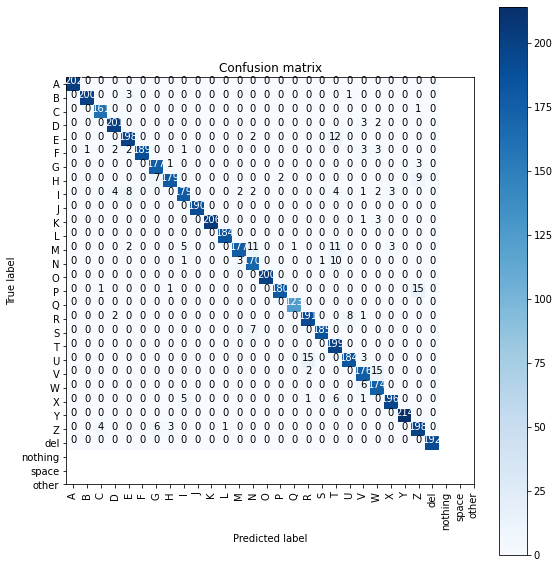

In [ ]:
map_characters1 = map_characters
class_weight1 = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weight2 = {}
for i in range(26):
  class_weight2[i] = class_weight1[i]
class_weight2[27] = class_weight1[26]
class_weight2[26] = 0
for i in range(28,30):
  class_weight2[i] = 0
weight_path1 = '../input/keras_pretrained_models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
#weight_path2 = '../input/keras_pretrained_models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(50, 50, 3))
print(X_train.shape)
#pretrained_model_1 = InceptionV3(weights = weight_path2, include_top=False, input_shape=(imageSize, imageSize, 3))
import tensorflow as tf
optimizer1 = tf.keras.optimizers.Adam()
optimizer2 = keras.optimizer_v1.RMSprop(lr=0.0001)
def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,optimizer,labels):
    base_model = pretrained_model_1 # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(base_model.input, outputs=predictions)
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    # Fit model
    history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1)
    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = model.predict(xtest)
    #print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values()))[:-1], sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    '''plotKerasLearningCurve()
    plt.show()
    plot_learning_curve(history)
    plt.show()
    '''
    plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plt.show()
    return model, (Y_true, Y_pred_classes)
print(class_weight2)
model, (yt, ypc) = pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,pretrained_model_1,weight_path1,class_weight2,30,30,optimizer1,map_characters1)

Great, we were able to interpret the signs with an accuracy rate of approximately 92%.  That is much better than random chance given that there were 26 different signs!

In [ ]:
np.save('ypc_30', ypc)
np.save('yt_30', yt)

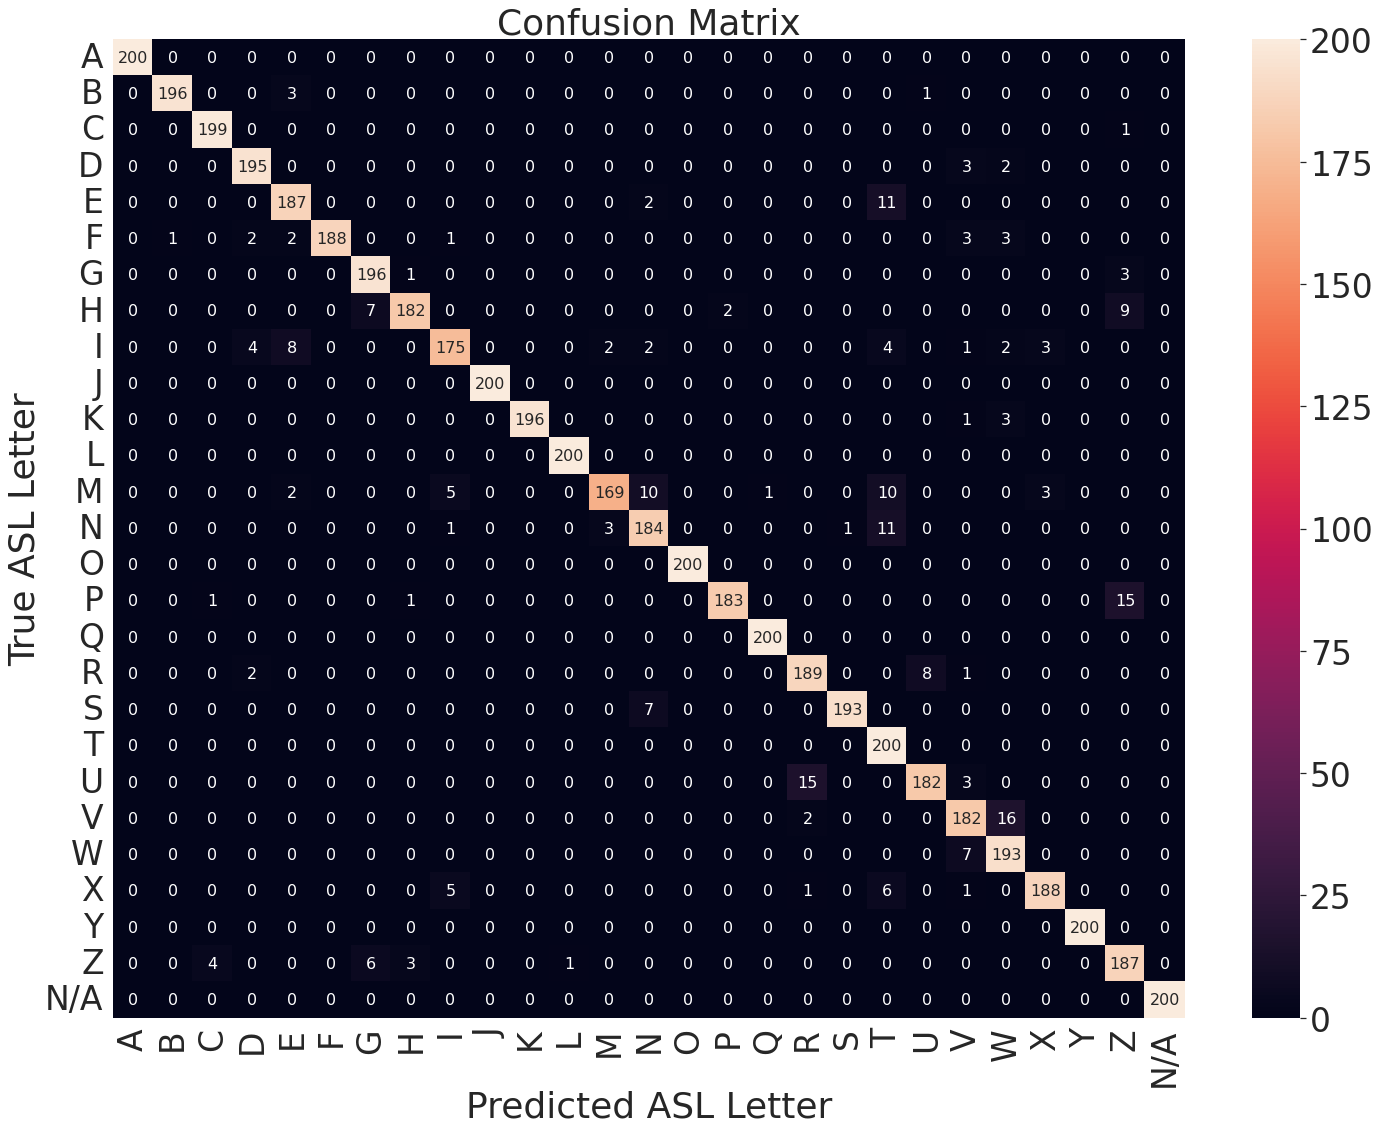

In [83]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ls = [map_characters[i] for i in range(26)]
ls.append('N/A')
def conf_mat(Y_true, Y_pred):
  array = [[0] * 27 for _ in range(27)]
  for i in range(len(Y_true)):
    x = Y_true[i]
    y = Y_pred[i]
    if x == 27:
      x -= 1
    if y == 27:
      y -= 1
    array[x][y] += 1
  for i in range(27):
    rowsum = sum(array[i])
    sc = 200 / rowsum
    for j in range(27):
      array[i][j] *= sc
      array[i][j] = round(array[i][j])
  df_cm = pd.DataFrame(array, ls, ls)
  plt.figure(figsize=(12*2,9*2))
  plt.rcParams['font.size'] = 4
  plt.title('Confusion Matrix')
  sn.set(font_scale=1*3) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 8*2}, fmt='g')
  plt.xlabel('Predicted ASL Letter')
  plt.ylabel('True ASL Letter')
  plt.show()
conf_mat(yt, ypc)

In [ ]:
# model.save('model')
with open('final_config_30.json', 'w') as file:
    file.write(model.to_json())
model.save_weights('final_weights_30.h5')

In [ ]:
%pip install coremltools

     |████████████████████████████████| 1.6 MB 5.6 MB/s 


In [ ]:
import coremltools
with open('final_config.json', 'r') as file:
  config = file.read()
model = keras.models.model_from_json(config)
model.load_weights('final_weights.h5')
#model.summary()
lbls = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
clss = [str(k) for k in lbls.keys()]
mlmodel = coremltools.converters._converters_entry.convert(
    model,
    source='tensorflow'
)
mlmodel.save('final_30.mlmodel')

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 166/166 [00:03<00:00, 43.15 ops/s]


In [ ]:
import coremltools
import coremltools.proto.FeatureTypes_pb2 as ft 

spec = coremltools.utils.load_spec("final_30.mlmodel")

input = spec.description.input[0]
input.type.imageType.colorSpace = ft.ImageFeatureType.RGB
input.type.imageType.height = 50
input.type.imageType.width = 50

coremltools.utils.save_spec(spec, "final_30.mlmodel")